In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/country_statistics_n46_20170511.csv")

In [4]:
# For optional outlier testing:
# df = df[!(df$country %in% c("Indonesia", "Malaysia", "Philippines")), ]

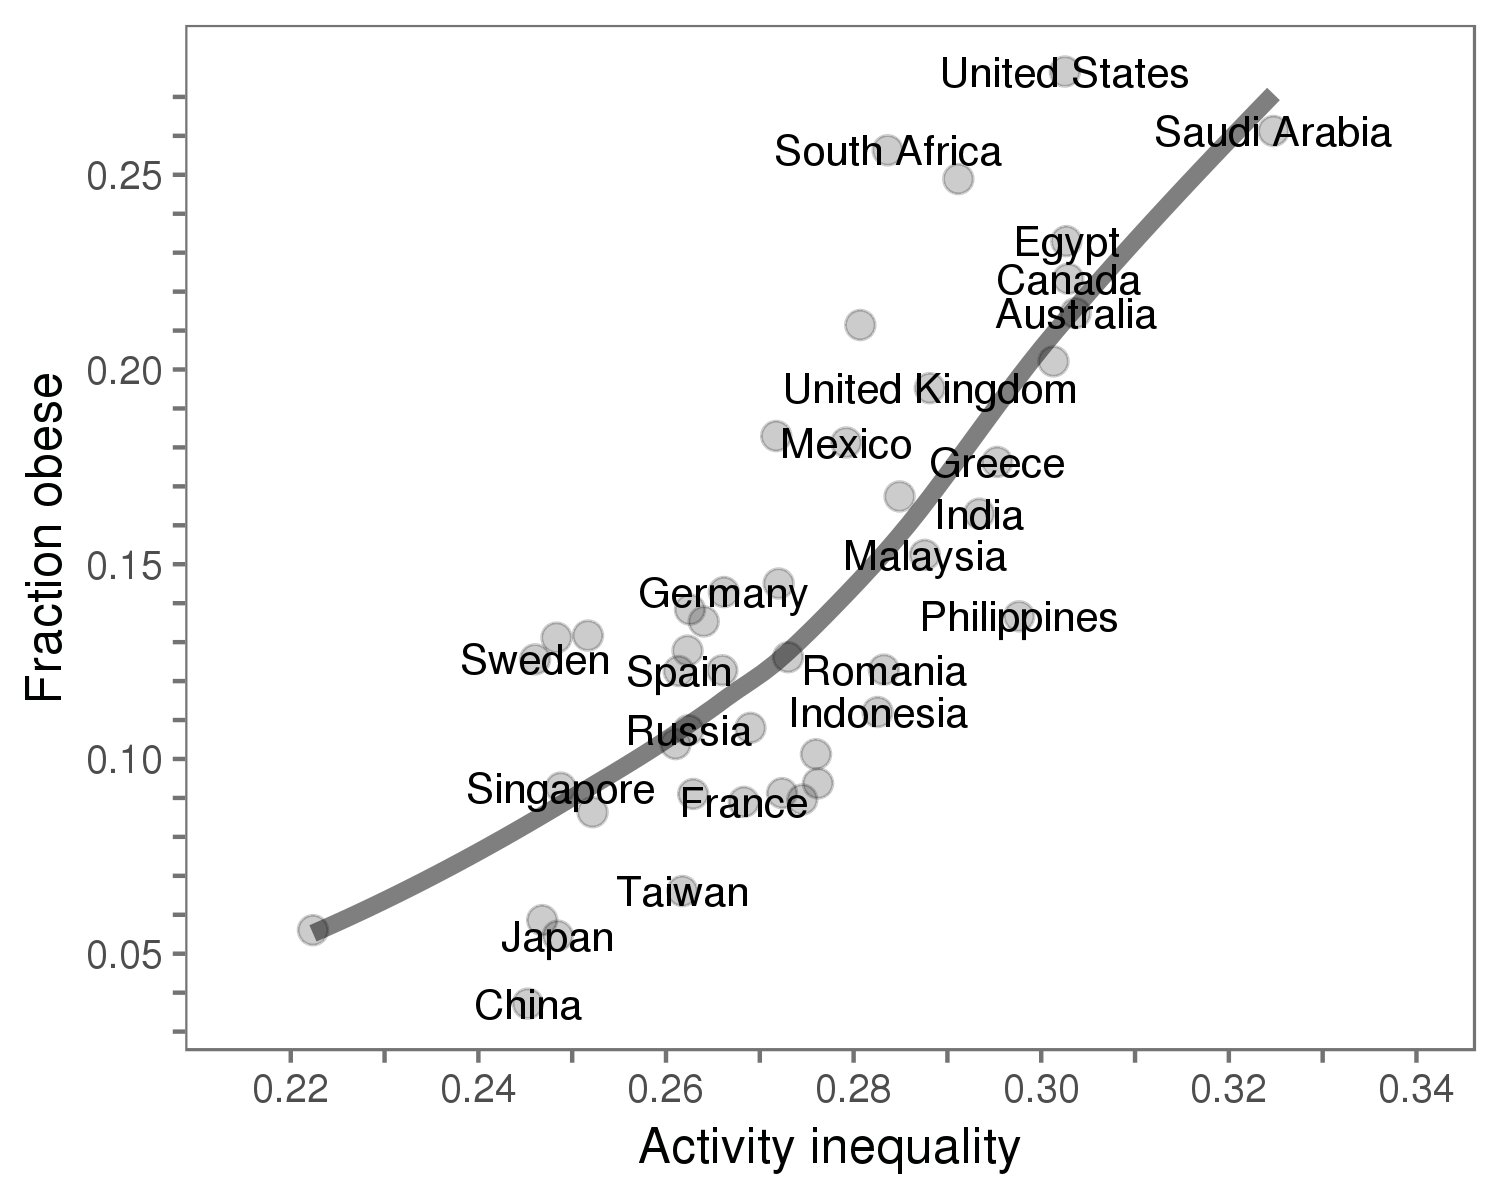

In [5]:
p <- ggplot(df, aes(steps_gini, obesity_mean, 
                   label=country))
p <- p + geom_smooth(aes(group=1), method="loess",span=.9,  se = F, size=2.0, color="gray50", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + xlab("Activity inequality") + ylab("Fraction obese")
p <- p + guides(color=FALSE) + guides(size=FALSE)

p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set1")

# xticks
ticks = seq(.22,.36,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.215, .34))
# yticks
ticks = seq(.00,.27,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%.2f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)
p

ggsave(filename="../output/fig2a.pdf", plot=p, width=4, height=4)
ggsave(filename="../output/edfig6b.pdf", plot=p, width=4, height=3)

Activity inequality predicts obesity (LOESS fit; $R^2$ = 0.64). 
Individuals in the five countries with highest activity inequality are 196% more likely to be obese than individuals from the 5 countries with lowest activity inequality.

In [6]:
# Correlation
cor.test(df$steps_gini, df$obesity_mean)


	Pearson's product-moment correlation

data:  df$steps_gini and df$obesity_mean
t = 8.4622, df = 44, p-value = 8.837e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6438190 0.8769607
sample estimates:
      cor 
0.7870229 


In [7]:
# R^2

#loess_fit
f = df$obesity_mean ~ df$steps_gini
# f = df$obesity_mean ~ df$steps_mean
loess.m <- loess(f, span=0.9, family="symmetric")
hat <- predict(loess.m)

(r_sq_loess <- cor(df$obesity_mean, hat)^2)

[1] 0.6371555

In [8]:
# Computing effect size
temp = df[!is.na(df$country), ]
temp = temp[order(temp$steps_gini), ]
N = 5
mean(head(temp, N)$obesity_mean)
mean(tail(temp, N)$obesity_mean)

mean(tail(temp, N)$obesity_mean) / mean(head(temp, N)$obesity_mean)

100 * mean(tail(temp, N)$obesity_mean) / mean(head(temp, N)$obesity_mean) - 100

[1] 0.08171051

[1] 0.2417005

[1] 2.95801

[1] 195.801